<font size="5">
Project Name - Customer Segmentation Using K-Means <br>
Project Type - K-Means Clustering Problem <br>
Contribution - Indiviual<br>
Team member 1 - Sakshi Sataye<br>
</font>

### Importing Required Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<font size="4">Project Summary: </font><br>

Objective:
The goal of this project is to segment customers of a retail shop based on their purchase history and demographic information. By using K-Means clustering, we aim to identify distinct customer groups, which can then be targeted with personalized marketing strategies to enhance customer satisfaction and increase sales.

<font size="6">Understanding variables</font>

The dataset contains the following columns:

CustomerID: Unique identifier for each customer.
Genre: Gender of the customer (Male/Female).
Age: Age of the customer.
Annual Income (k$): Annual income of the customer in thousands of dollars.
Spending Score (1-100): Score assigned by the retail shop based on customer behavior and spending nature.

In [3]:
#importing data
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#understanding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#checking null values

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Here, we can see there are no null values.

Checking duplicate values

In [9]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


Splitting x and y value

In [24]:
x = df.iloc[:,[3,4]].values

In [25]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Importing Libraries

In [26]:
### Building k means clustering algo.
from sklearn.cluster import KMeans

In [27]:
'''
Here we don't have domain knowledge hence we can not decide the value of k first. So we use Elbow method to decide the value of k.
'''

"\nHere we don't have domain knowledge hence we can not decide the value of k first. So we use Elbow method to decide the value of k.\n"

In [28]:
km=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=1)
km.fit(x)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [29]:
km.inertia_

106348.37306211119

In [30]:
km.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

### Elbow method

In [31]:
# wcss full form - within cluster sum of square
wcss = []

for k in range(1,30):
    km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)

In [32]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25002.361699994155,
 21829.13563877983,
 20035.13778397607,
 17860.918734043735,
 16153.173029286314,
 14271.67028265852,
 13218.79278709796,
 11925.536165794989,
 10979.62758563276,
 9903.609931160794,
 9299.722157744216,
 8725.925612605786,
 8272.360357355064,
 7772.761631351105,
 7454.045741758242,
 6949.624460811992,
 6521.023618353798,
 6151.0226589423655,
 5828.8900413596075,
 5481.831189977071,
 5271.179797979798,
 5029.2925940073]

In [33]:
pd.DataFrame({'k value ':range(1,30),'intertia':wcss})

,k value,intertia
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30566.451130
7,8,25002.361700
8,9,21829.135639
9,10,20035.137784


Graphical Representation of elbow method

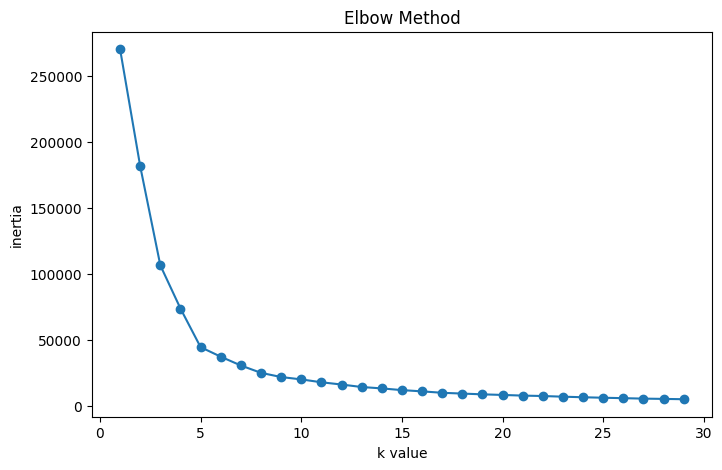

In [34]:
plt.figure(figsize=[8,5])
plt.title("Elbow Method")
plt.plot(range(1,30),wcss,marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.show()

In [35]:
# final value of elbow method  is 5, so will build out final model

In [36]:
km1=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=1)
labels=km1.fit_predict(x)

In [37]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [38]:
df["groups"]=labels

In [39]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),groups
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [40]:
# printing value of inertia when k = 5
km1.inertia_

44448.45544793371

In [41]:
#printing value of centroids
km1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [42]:
centroid_df = pd.DataFrame(km1.cluster_centers_,columns=['x','y'])
centroid_df

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


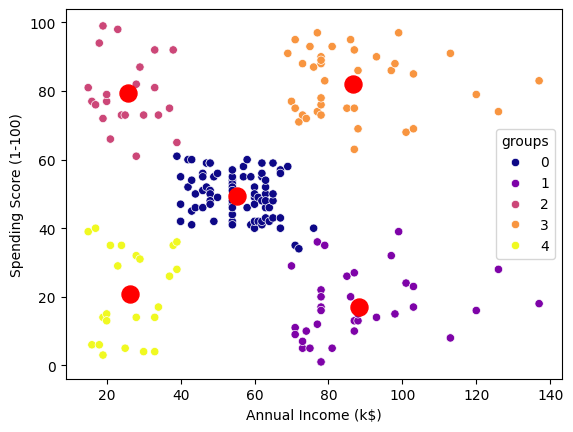

In [43]:
#scatter plot
sns.scatterplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['groups'],palette='plasma')
plt.scatter(centroid_df['x'],centroid_df['y'],s=150,c='red')
plt.show()

From above scatter plot we get following insights:
1. Customers having income between 20k to 40k spend very less.
2. Customers having income between 40k to 70k having moderate spending score i.e 40 to 60.
3. Customers having income between above 80k have more spending score and should be paid more attention.